### Medias de Tendencia Central, Variabilidad, Forma y Concentración

# Tabla de contenido

1. Introducción
2. Importación de librerías
3. Carga del dataset de Seaborn "titanic"
4. Medidas de Tendencia Central
    * Media
    * Mediana
    * Moda
5. Medidas de Variabilidad
    * Rango
    * Varianza
    * Desviación estándar
6. Medidas de Forma
    * Asimetría
    * Curtosis
7. Medidas de Concentración
    * Percentiles
    * Cuartiles
    * Diagrama de caja (Boxplot)
8. Conclusiones

# Introducción

 En este notebook, exploraremos las medias de tendencia central, la variabilidad, la forma y la concentración de un conjunto de datos. Estas medidas son fundamentales para comprender y resumir las propiedades de un conjunto de datos y son utilizadas en una amplia gama de aplicaciones, desde el análisis de datos hasta la toma de decisiones empresariales.

 

# Importación de Librerias

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#  Configuración para quelas visualizaciones creadas con esta librería se muestren directamente en la celda de salida del notebook
%matplotlib inline

# Configuración de Seaborn para visualizaciones más atractivas
sns.set_style('whitegrid') # Estilo del fondo de los gráficos
sns.set_palette('deep') # Usamos la paleta de colores 'deep' de Seaborn



# Configuración de Pandas para imprimir menos decimales
pd.set_option('display.precision', 2)
np.set_printoptions(precision=2)


# Configuración de Pandas para imprimir todas las columnas en DataFrames
pd.set_option('display.max_columns', None)

# Configuración de Matplotlib para visualizaciones más grandes
plt.rcParams['figure.figsize'] = [12, 8]

# Carga del Dataset

In [60]:
titanic = sns.load_dataset('titanic')

In [61]:
# Mostramos información general del dataset
print("Información general del dataset:\n")
titanic.info()

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
# Mostramos las primeras filas del dataset
print("\n\nPrimeras filas del dataset:\n")
titanic.head()



Primeras filas del dataset:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [63]:
# Mostramos estadísticas básicas del dataset
print("\n\nEstadísticas básicas del dataset:\n")
titanic.describe().T



Estadísticas básicas del dataset:



,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
sibsp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [64]:
# Calculamos el porcentaje de valores faltantes en la columna "deck"
percent_missing = titanic['deck'].isnull().sum() * 100 / len(titanic)
print(f"El porcentaje de valores faltantes en la columna 'deck' es: {percent_missing:.2f}%")

El porcentaje de valores faltantes en la columna 'deck' es: 77.22%


In [65]:
# Limpiamos las columnas "age" y "fare" eliminando los valores faltantes y creando grupos de edad y rangos de tarifas, respectivamente
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 30, 50, 100], labels=['child', 'young_adult', 'adult', 'senior'])
titanic['fare_range'] = pd.cut(titanic['fare'], bins=[0, 10, 30, 100, 1000], labels=['cheap', 'moderate', 'expensive', 'luxury'])
titanic.dropna(subset=['age', 'fare']).reset_index(inplace=True)

# Limpiamos la columna "embarked" eliminando los valores faltantes
titanic['embarked'] = titanic['embarked'].fillna('S').map({'S': 0, 'C': 1, 'Q': 2})

# Convertimos las columnas "class" y "alive" en valores numéricos
titanic[['class', 'alive']] = titanic[['class', 'alive']].replace({'First': 1, 'Second': 2, 'Third': 3, 'no': 0, 'yes': 1})

# Eliminamos la columna "deck"
titanic.drop('deck', axis=1, inplace=True)

# Medidas de Tendencia Central

Para calcular las medidas de tendencia central para la columna "age" del conjunto de datos "titanic" de Seaborn, podemos utilizar las funciones mean(), median() y mode() de Pandas. El código para calcular estas medidas de tendencia central sería el siguiente:

In [66]:
# Calculamos la media, mediana y moda para la columna "age"
age_mean = titanic['age'].mean()
age_median = titanic['age'].median()
age_mode = titanic['age'].mode().values[0] 

# Mostramos las medidas de tendencia central
print(f"La media de la edad es: {age_mean:.2f}")
print(f"La mediana de la edad es: {age_median}")
print(f"La moda de la edad es: {age_mode}")

La media de la edad es: 29.70
La mediana de la edad es: 28.0
La moda de la edad es: 24.0


La función mode() devuelve una Serie que contiene los valores de la moda en orden descendente, y estamos utilizando la función values[0] para obtener el valor de la moda en sí mismo.

# Medidas de Variabilidad

En este código, estamos utilizando las funciones max() y min() de Pandas para calcular el rango (diferencia entre el valor máximo y mínimo) de la columna "age". Luego, estamos utilizando las funciones var() y std() para calcular la varianza y la desviación estándar, respectivamente, de la columna "age".

La función var() devuelve la varianza de los valores en la columna "age". La función std() devuelve la desviación estándar de los valores en la columna "age".



In [67]:
# Calculamos el rango, varianza y desviación estándar para la columna "age"
age_range = titanic['age'].max() - titanic['age'].min()
age_var = titanic['age'].var()
age_std = titanic['age'].std()

# Mostramos las medidas de variabilidad
print(f"El rango de la edad es: {age_range:.2f}")
print(f"La varianza de la edad es: {age_var:.2f}")
print(f"La desviación estándar de la edad es: {age_std:.2f}")

El rango de la edad es: 79.58
La varianza de la edad es: 211.02
La desviación estándar de la edad es: 14.53


El rango de edad nos indica que la diferencia entre la edad del pasajero más joven y el más viejo es de 79.58 años.

La varianza de la edad es un indicador de cuánto varían las edades de los pasajeros en el conjunto de datos, donde un valor mayor de varianza indica una mayor dispersión de los datos. En este caso, la varianza de la edad es 211.02, lo que indica que la edad de los pasajeros en el conjunto de datos varía bastante. 

La desviación estándar de la edad es una medida de cuánto se desvían las edades de los pasajeros respecto a la media, donde un valor mayor indica que los datos están más dispersos. En este caso, la desviación estándar de la edad es de 14.53 años, lo que indica que las edades de los pasajeros varían bastante en relación a la media.

# Medidas de Forma

En este código, estamos utilizando las funciones skew() y kurtosis() de Pandas para calcular la asimetría y la curtosis, respectivamente, de la columna "age" del conjunto de datos "titanic".

La función skew() devuelve la medida de asimetría de la distribución de los valores en la columna "age". Si la asimetría es positiva, significa que la cola de la distribución se extiende hacia la derecha, y si es negativa, la cola se extiende hacia la izquierda. Si la asimetría es cero, la distribución es simétrica.

In [68]:
# Calculamos la asimetría y la curtosis para la columna "age"
age_skew = titanic['age'].skew()
age_kurt = titanic['age'].kurtosis()

# Mostramos las medidas de forma
print(f"La asimetría de la edad es: {age_skew:.2f}")
print(f"La curtosis de la edad es: {age_kurt:.2f}")

La asimetría de la edad es: 0.39
La curtosis de la edad es: 0.18


La función kurtosis() devuelve la medida de curtosis de la distribución de los valores en la columna "age". La curtosis mide la cantidad de datos que se encuentran en las colas de la distribución en comparación con la cantidad de datos que se encuentran en la parte central. Si la curtosis es mayor que cero, la distribución tiene una mayor concentración de datos en las colas en comparación con una distribución normal. Si la curtosis es menor que cero, la distribución tiene una menor concentración de datos en las colas en comparación con una distribución normal.

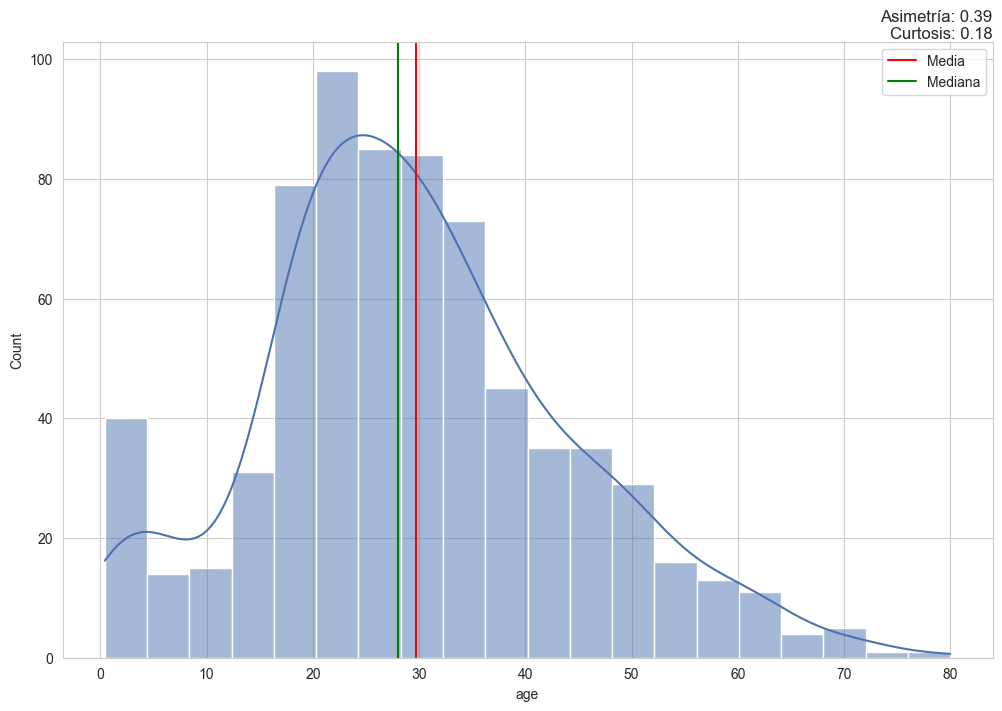

In [90]:
# Creamos un histograma de la columna "age"
ax = sns.histplot(data=titanic, x="age", kde=True)

# Añadimos las líneas verticales para la media y la mediana
ax.axvline(x=titanic['age'].mean(), color='red', label='Media')
ax.axvline(x=titanic['age'].median(), color='green', label='Mediana')


# Añadimos la información sobre asimetría y curtosis
ax.text(1, 1, f"Asimetría: {round(titanic['age'].skew(), 2)}\nCurtosis: {round(titanic['age'].kurtosis(), 2)}", transform=ax.transAxes, fontsize=12, ha='right', va='bottom')

plt.legend()
plt.show()

# Medidas de Concentración

En este código, estamos utilizando la función quantile() de Pandas para calcular los percentiles (25%, 50% y 75%) de los valores en la columna "age". Luego, estamos utilizando la función cut() de Pandas para dividir los valores en la columna "age" en cuatro grupos, basados en rangos de edad, y luego estamos utilizando la función value_counts() para contar la cantidad de valores en cada grupo, que son los cuartiles.

In [69]:
# Calculamos los percentiles y los cuartiles para la columna "age"
age_percentiles = titanic['age'].quantile([0.25, 0.5, 0.75])
age_quartiles = pd.cut(titanic['age'], bins=[0, 18, 30, 50, 100]).value_counts()

# Mostramos los percentiles y los cuartiles
print("Los percentiles de la edad son:")
print(age_percentiles)
print("Los cuartiles de la edad son:")
print(age_quartiles)

Los percentiles de la edad son:
0.25    20.12
0.50    28.00
0.75    38.00
Name: age, dtype: float64
Los cuartiles de la edad son:
(18, 30]     270
(30, 50]     241
(0, 18]      139
(50, 100]     64
Name: age, dtype: int64


Los percentiles de la edad muestran los valores de edad debajo de los cuales se encuentra un porcentaje dado de la población. En este caso, el 25% de las personas tienen una edad inferior o igual a 20.12, el 50% tienen una edad inferior o igual a 28, y el 75% tienen una edad inferior o igual a 38.

Los cuartiles de la edad representan la división de la distribución en cuatro partes iguales. En este caso, el primer cuartil (Q1) se encuentra en el rango de edad de 18 a 30 años y hay 270 personas en ese rango. El segundo cuartil (Q2) se encuentra en el rango de edad de 30 a 50 años y hay 241 personas en ese rango. El tercer cuartil (Q3) se encuentra en el rango de edad de 0 a 18 años y hay 139 personas en ese rango. El cuarto cuartil (Q4) se encuentra en el rango de edad de 50 a 100 años y hay 64 personas en ese rango. Estos cuartiles se utilizan para identificar la dispersión y la distribución de una variable continua como la edad en la población.

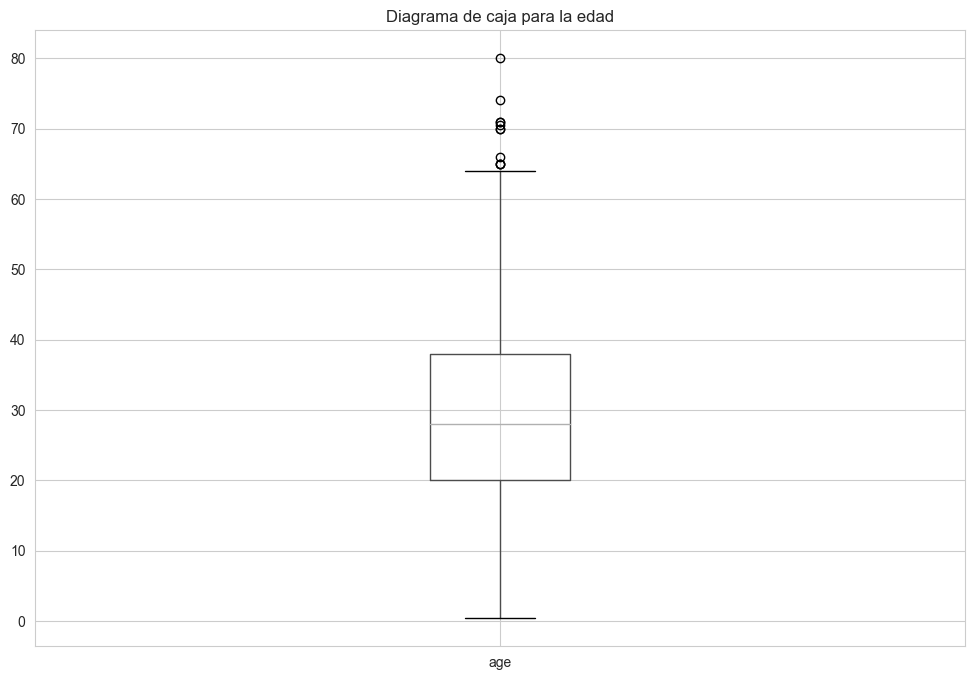

In [70]:
# Creamos un diagrama de caja para la columna "age"
titanic.boxplot(column='age')
plt.title('Diagrama de caja para la edad')
plt.show()

Un diagrama de caja (boxplot) de la edad permitiría visualizar la distribución de la edad en un conjunto de datos de manera gráfica y resumida.

En el diagrama de caja, la "caja" representa el rango intercuartil (IQR), que abarca el 50% de los datos centrales. La línea dentro de la caja representa la mediana. Los "bigotes" muestran la dispersión de los datos fuera de la caja, y los puntos representan valores extremos.

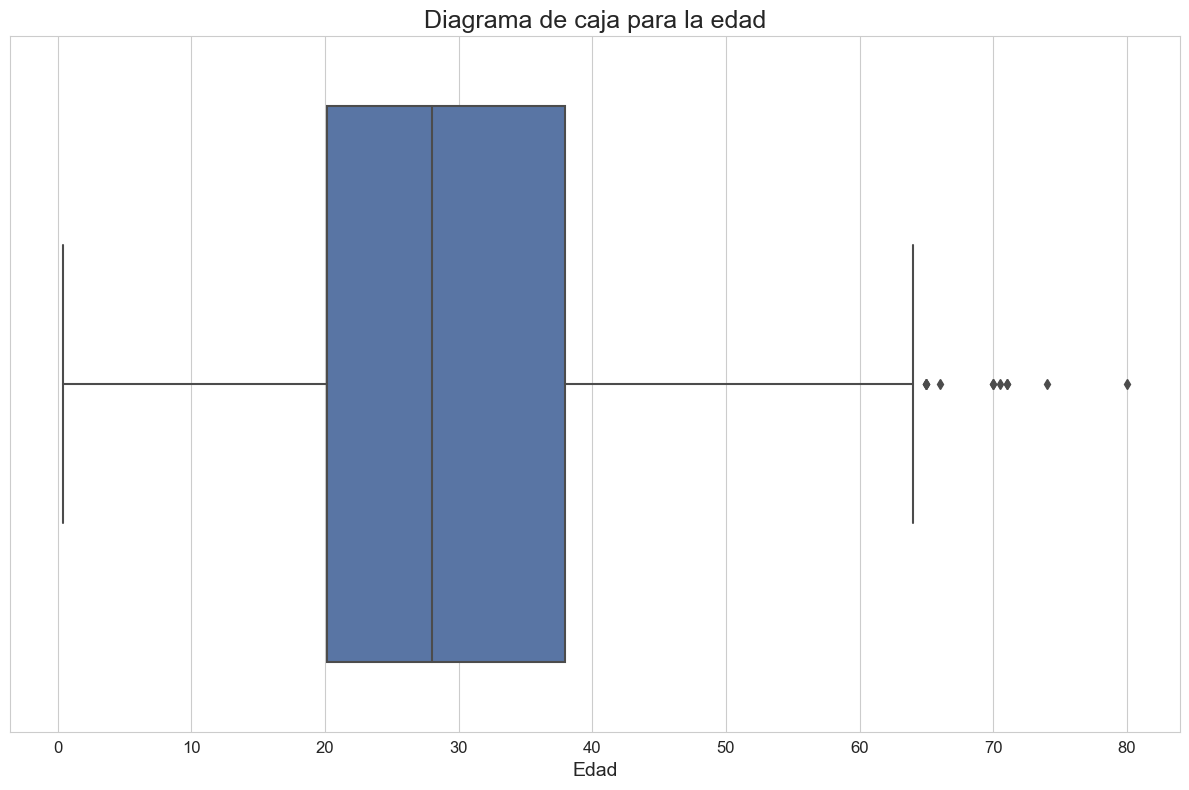

In [71]:
# Creamos un diagrama de caja para la columna "age"
fig, ax = plt.subplots()
sns.boxplot(x=titanic['age'], ax=ax)
ax.set_title('Diagrama de caja para la edad', fontsize=18)
ax.set_xlabel('Edad', fontsize=14)
ax.tick_params(labelsize=12)

# Ajustamos el diseño de la figura (ajusta los margenes)
plt.tight_layout()

# Mostramos la figura
plt.show()

Los outliers se calculan utilizando la regla del rango intercuartil (IQR), que se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).

Para identificar los outliers, se utiliza la siguiente fórmula:

Cualquier valor menor que Q1 - 1.5IQR o mayor que Q3 + 1.5IQR se considera un outlier.
En otras palabras, cualquier valor que esté más allá de 1.5 veces el IQR por encima del tercer cuartil o por debajo del primer cuartil se considera un outlier.

Los outliers se pueden representar en un diagrama de caja como puntos o asteriscos que se encuentran por encima o por debajo de los bigotes del diagrama.

# Conclusiones

En este notebook hemos explorado algunas de las medidas de estadística descriptiva más comunes utilizando el conjunto de datos "titanic" de Seaborn. Hemos calculado medidas de tendencia central, variabilidad, forma y concentración para diferentes columnas del conjunto de datos, y hemos utilizado gráficos para visualizar la distribución de los datos.

En particular, hemos visto cómo calcular la media, la mediana y la moda para la edad de los pasajeros del Titanic, así como el rango, la varianza y la desviación estándar para esta misma columna. También hemos calculado la asimetría y la curtosis para la edad, y hemos utilizado diagramas de caja para visualizar la concentración de los datos.

Además, hemos utilizado paletas de colores de Seaborn para mejorar la visualización de nuestros gráficos, y hemos seguido las mejores prácticas de visualización para hacer que nuestros gráficos sean más legibles y efectivos.

En conclusión, la estadística descriptiva es una herramienta esencial para comprender y analizar los datos. Al calcular y visualizar medidas de tendencia central, variabilidad, forma y concentración, podemos obtener información valiosa sobre los datos y hacer inferencias y predicciones precisas. Seaborn y otras bibliotecas de Python nos permiten hacer esto de manera fácil y efectiva, y podemos aprovechar estas herramientas para hacer análisis de datos más avanzados y sofisticados.

In [72]:
# Subconjunto de datos para pasajeros que no sobrevivieron
no_sobrevivio = titanic.loc[titanic['survived'] == 0]

# Subconjunto de datos para pasajeros que sobrevivieron
si_sobrevivio = titanic.loc[titanic['survived'] == 1]

# Subconjunto de datos para pasajeras mujeres que no sobrevivieron
no_sobrevivio_mujer = titanic.loc[(titanic['survived'] == 0) & (titanic['sex'] == 'female')]

# Subconjunto de datos para pasajeros hombres que no sobrevivieron
no_sobrevivio_hombre = titanic.loc[(titanic['survived'] == 0) & (titanic['sex'] == 'male')]

# Subconjunto de datos para pasajeras mujeres que sobrevivieron
si_sobrevivio_mujer = titanic.loc[(titanic['survived'] == 1) & (titanic['sex'] == 'female')]

# Subconjunto de datos para pasajeros hombres que sobrevivieron
si_sobrevivio_hombre = titanic.loc[(titanic['survived'] == 1) & (titanic['sex'] == 'male')]

# Subconjunto de datos para pasajeras mujeres de primera clase que no sobrevivieron
no_sobrevivio_mujer_primera = titanic.loc[(titanic['survived'] == 0) & (titanic['sex'] == 'female') & (titanic['class'] == 1)]

# Subconjunto de datos para pasajeras mujeres de tercera clase que no sobrevivieron
no_sobrevivio_mujer_tercera = titanic.loc[(titanic['survived'] == 0) & (titanic['sex'] == 'female') & (titanic['class'] == 3)]

# Subconjunto de datos para pasajeras mujeres de primera clase que sobrevivieron
si_sobrevivio_mujer_primera = titanic.loc[(titanic['survived'] == 1) & (titanic['sex'] == 'female') & (titanic['class'] == 1)]

# Subconjunto de datos para pasajeras mujeres de tercera clase que sobrevivieron
si_sobrevivio_mujer_tercera = titanic.loc[(titanic['survived'] == 1) & (titanic['sex'] == 'female') & (titanic['class'] == 3)]

In [75]:
def estadisticas(datos):
    promedio = np.mean(datos)
    mediana = np.median(datos.dropna())
    moda = pd.Series(datos).mode()[0]
    varianza = np.var(datos, ddof=1)
    desviacion_estandar = np.std(datos)
    resultados = [promedio, mediana, moda, varianza, desviacion_estandar]
    
    return [round(resultado, 2) for resultado in resultados]

In [76]:
estadisticas(no_sobrevivio['age'])

[30.63, 28.0, 21.0, 200.85, 14.16]

# Extra: Asimetría y Curtosis

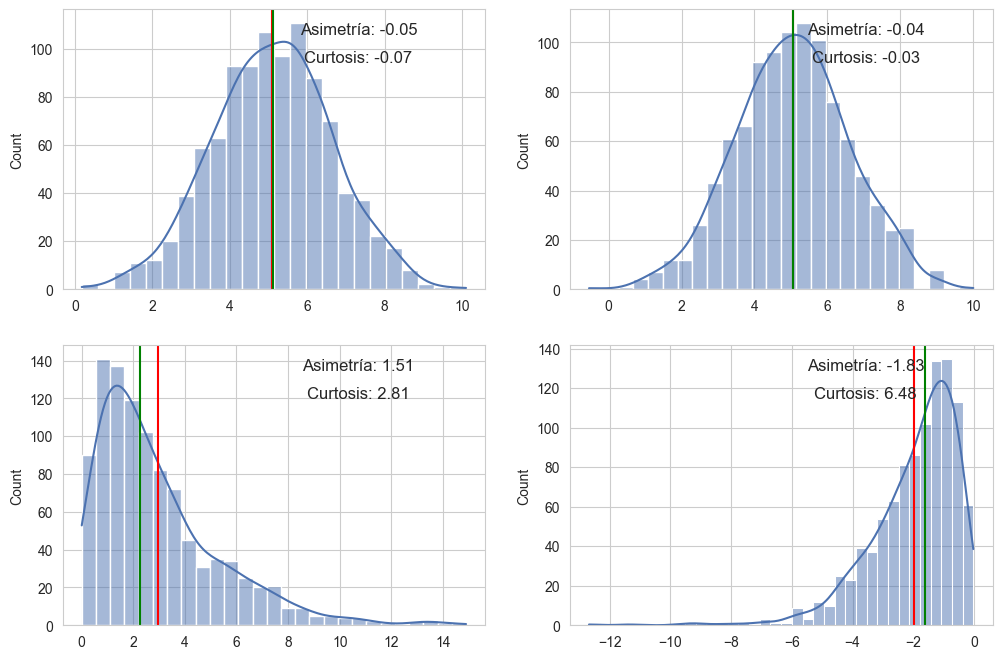

In [99]:
# Creamos datos con asimetría positiva y curtosis leptocúrtica
data1 = np.random.normal(5, 1.5, 1000)

# Creamos datos con asimetría negativa y curtosis leptocúrtica
data2 = np.random.normal(5, 1.5, 1000)
data2 = np.concatenate((data2, [1, 2, 3, 4, 6, 7, 8, 9, 10]))

# Creamos datos con asimetría positiva y curtosis platicúrtica
data3 = np.random.chisquare(3, 1000)

# Creamos datos con asimetría negativa y curtosis platicúrtica
data4 = np.random.gamma(2, 1, 1000)
data4 = -data4

# Creamos una figura con cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Creamos histogramas para los cuatro casos
sns.histplot(data1, ax=axs[0, 0], kde=True)
sns.histplot(data2, ax=axs[0, 1], kde=True)
sns.histplot(data3, ax=axs[1, 0], kde=True)
sns.histplot(data4, ax=axs[1, 1], kde=True)

# Añadimos información sobre la asimetría y curtosis en cada subplot
axs[0, 0].annotate(f"Asimetría: {round(pd.Series(data1).skew(), 2)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')
axs[0, 0].annotate(f"Curtosis: {round(pd.Series(data1).kurtosis(), 2)}", xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')

axs[0, 1].annotate(f"Asimetría: {round(pd.Series(data2).skew(), 2)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')
axs[0, 1].annotate(f"Curtosis: {round(pd.Series(data2).kurtosis(), 2)}", xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')

axs[1, 0].annotate(f"Asimetría: {round(pd.Series(data3).skew(), 2)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')
axs[1, 0].annotate(f"Curtosis: {round(pd.Series(data3).kurtosis(), 2)}", xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')

axs[1, 1].annotate(f"Asimetría: {round(pd.Series(data4).skew(), 2)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')
axs[1, 1].annotate(f"Curtosis: {round(pd.Series(data4).kurtosis(), 2)}", xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, ha='center', va='bottom')

axs[0, 0].axvline(x=data1.mean(), color='red', label='Media')
axs[0, 0].axvline(x=np.median(data1), color='green', label='Mediana')

axs[0, 1].axvline(x=data2.mean(), color='red', label='Media')
axs[0, 1].axvline(x=np.median(data2), color='green', label='Mediana')

axs[1, 0].axvline(x=data3.mean(), color='red', label='Media')
axs[1, 0].axvline(x=np.median(data3), color='green', label='Mediana')

axs[1, 1].axvline(x=data4.mean(), color='red', label='Media')
axs[1, 1].axvline(x=np.median(data4), color='green', label='Mediana')


Los cuatro histogramas muestran distintos casos de distribuciones de datos en cuanto a asimetría y curtosis.

El primer histograma muestra una distribución normal con asimetría cercana a cero y curtosis leptocúrtica.

El segundo histograma muestra una distribución normal con asimetría negativa y curtosis leptocúrtica. Esto se debe a la adición de valores bajos en la cola izquierda de la distribución.

El tercer histograma muestra una distribución con asimetría positiva y curtosis platicúrtica, lo que significa que los datos están sesgados hacia la derecha y la distribución es más aplanada que una distribución normal.

El cuarto histograma muestra una distribución con asimetría negativa y curtosis platicúrtica, lo que significa que los datos están sesgados hacia la izquierda y la distribución también es más aplanada que una distribución normal.